# Case pan

In [1]:
from sql.database import connect, query
import matplotlib.pyplot as plt

SQL_DIR ="sql/assets/"
OUTPUT_DIR ="data/output/"
conn = connect()

In [2]:
query(conn, """select * from scr limit 10""")

,chave_cpf,data_consulta_dado_bacen,codigo_modalidade_operacao,valor_credito_vencer_ate_30_dia,valor_credito_vencer_31_60_dia,valor_credito_vencer_61_90_dia,valor_credito_vencer_acima_90_dia,valor_credito_vencido_15_30_dia,valor_credito_vencido_31_60_dia,valor_credito_vencido_61_90_dia,valor_credito_vencido_acima_90_dia
0,16995749332,2022-07,204,45.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16995749332,2022-08,1304,3640.77,1257.52,1538.4,1015.28,0.0,0.0,0.0,0.0
2,16997816780,2022-07,210,203.6,666.31,58.43,1977.26,0.0,1062.02,0.0,0.0
3,16997816780,2022-08,210,37.48,291.71,91.9,482.06,0.0,0.0,229.21,0.0
4,16997816780,2022-08,1304,6267.32,2583.3,1387.72,5978.6,0.0,0.0,0.0,0.0
5,16997816780,2022-08,218,0.0,0.0,0.0,0.0,0.0,0.0,686.18,0.0
6,16997816780,2022-07,1304,247.38,631.97,979.09,5756.2,0.0,0.0,0.0,0.0
7,16997816780,2022-07,204,1585.77,0.0,0.0,0.0,542.3,1111.53,0.0,0.0
8,16997816780,2022-06,1304,9329.3,2885.1,2030.3,3257.73,0.0,0.0,0.0,0.0
9,16997816780,2022-08,204,11.26,0.0,0.0,0.0,0.0,49.07,376.2,0.0


In [3]:
query(conn, "PRAGMA table_info('scr');")

,cid,name,type,notnull,dflt_value,pk
0,0,chave_cpf,TEXT,0,None,0
1,1,data_consulta_dado_bacen,TEXT,0,None,0
2,2,codigo_modalidade_operacao,TEXT,0,None,0
3,3,valor_credito_vencer_ate_30_dia,TEXT,0,None,0
4,4,valor_credito_vencer_31_60_dia,TEXT,0,None,0
5,5,valor_credito_vencer_61_90_dia,TEXT,0,None,0
6,6,valor_credito_vencer_acima_90_dia,TEXT,0,None,0
7,7,valor_credito_vencido_15_30_dia,TEXT,0,None,0
8,8,valor_credito_vencido_31_60_dia,TEXT,0,None,0
9,9,valor_credito_vencido_61_90_dia,TEXT,0,None,0


In [4]:
def get_sql_file(file_name):
    '''
    Read a SQL file and return a string with the SQL code
    '''
    with open(SQL_DIR+file_name, 'r') as sql_file:
        return sql_file.read()

##  1 - Cria a tabela com as modalidades

In [5]:
sql_script = get_sql_file('create_table_modalidades.sql')
conn.executescript(sql_script)
conn.commit()

In [6]:
query(conn, "select * from modalidades;")

,modalidade,dominio,subdominio,descricao
0,202,02,02,consignado
1,101,01,01,cheque_especial
2,213,02,13,cheque_especial
3,204,02,04,cartao_revolver
4,210,02,10,cartao_revolver
5,218,02,18,cartao_revolver
6,406,04,06,cartao_revolver
7,1304,13,04,cartao_transactor
8,499,04,99,outros


### Cria a tabela full com os dados das modalidade
    Informações pós join
    #36.958 null 13,55%
    #235.661 not null

In [7]:
sql_script = get_sql_file('create_table_scr_modalidades.sql')
conn.executescript(sql_script)
conn.commit()

In [8]:
query(conn, "select * from scr_modalidades limit 10;")

,chave_cpf,data_consulta_dado_bacen,codigo_modalidade_operacao,descricao,valor_credito_vencer_ate_30_dia,valor_credito_vencer_31_60_dia,valor_credito_vencer_61_90_dia,valor_credito_vencer_acima_90_dia,valor_credito_vencido_15_30_dia,valor_credito_vencido_31_60_dia,valor_credito_vencido_61_90_dia,valor_credito_vencido_acima_90_dia
0,16995749332,2022-07,204,cartao_revolver,45.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16995749332,2022-08,1304,cartao_transactor,3640.77,1257.52,1538.4,1015.28,0.0,0.0,0.0,0.0
2,16997816780,2022-07,210,cartao_revolver,203.6,666.31,58.43,1977.26,0.0,1062.02,0.0,0.0
3,16997816780,2022-08,210,cartao_revolver,37.48,291.71,91.9,482.06,0.0,0.0,229.21,0.0
4,16997816780,2022-08,1304,cartao_transactor,6267.32,2583.3,1387.72,5978.6,0.0,0.0,0.0,0.0
5,16997816780,2022-08,218,cartao_revolver,0.0,0.0,0.0,0.0,0.0,0.0,686.18,0.0
6,16997816780,2022-07,1304,cartao_transactor,247.38,631.97,979.09,5756.2,0.0,0.0,0.0,0.0
7,16997816780,2022-07,204,cartao_revolver,1585.77,0.0,0.0,0.0,542.3,1111.53,0.0,0.0
8,16997816780,2022-06,1304,cartao_transactor,9329.3,2885.1,2030.3,3257.73,0.0,0.0,0.0,0.0
9,16997816780,2022-08,204,cartao_revolver,11.26,0.0,0.0,0.0,0.0,49.07,376.2,0.0


## 2 - Cria as faixas com os "lags" necesarios 
    Exemplos
* consignado_valor_credito_vencer_ate_120_dia
* consignado_valor_credito_vencido_ate_120_dia
* consignado_valor_credito_vencer_ate_60_dia
* consignado_valor_credito_vencer_ate_90_dia
* consignado_valor_credito_vencido_ate_60_dia
* consignado_valor_credito_vencido_ate_90_dia

In [9]:
produtos = query(conn, "select distinct(descricao) from modalidades;")["descricao"].to_list()
df = query(conn, "PRAGMA table_info(scr);")
faixas = df[df["name"].str.contains("valor")]["name"].to_list()
print(produtos)
print(faixas)

['consignado', 'cheque_especial', 'cartao_revolver', 'cartao_transactor', 'outros']
['valor_credito_vencer_ate_30_dia', 'valor_credito_vencer_31_60_dia', 'valor_credito_vencer_61_90_dia', 'valor_credito_vencer_acima_90_dia', 'valor_credito_vencido_15_30_dia', 'valor_credito_vencido_31_60_dia', 'valor_credito_vencido_61_90_dia', 'valor_credito_vencido_acima_90_dia']


In [10]:
def generate_sql_case(produto, faixa):
    '''
        Generate a SQL CASE statement for a given product and range
    '''
    return f"SUM(CASE WHEN descricao = '{produto}' THEN {faixa} ELSE 0 END) AS {produto}_{faixa}\n,"
def generate_sql_base(faixa):
    return f"SUM({faixa}) AS {faixa}\n,"
    

In [11]:
sql_query = """DROP TABLE IF EXISTS scr_modalidades_faixas;\ncreate table scr_modalidades_faixas as SELECT chave_cpf\n,data_consulta_dado_bacen\n,"""
for faixa in faixas:
    sql_query += generate_sql_base(faixa)
for produto in produtos:
    for faixa in faixas:
        sql_query += generate_sql_case(produto, faixa)
sql_query = sql_query[:-1] + " FROM scr_modalidades GROUP BY chave_cpf, data_consulta_dado_bacen;"
with open(f'{SQL_DIR}create_table_scr_modalidades_faixas.sql', 'w') as f:
    f.write(sql_query)

In [12]:
sql_script = get_sql_file('create_table_scr_modalidades_faixas.sql')
conn.executescript(sql_script)
conn.commit()

In [13]:
query(conn,"select * from scr_modalidades_faixas limit 10;")

,chave_cpf,data_consulta_dado_bacen,valor_credito_vencer_ate_30_dia,valor_credito_vencer_31_60_dia,valor_credito_vencer_61_90_dia,valor_credito_vencer_acima_90_dia,valor_credito_vencido_15_30_dia,valor_credito_vencido_31_60_dia,valor_credito_vencido_61_90_dia,valor_credito_vencido_acima_90_dia,...,cartao_transactor_valor_credito_vencido_61_90_dia,cartao_transactor_valor_credito_vencido_acima_90_dia,outros_valor_credito_vencer_ate_30_dia,outros_valor_credito_vencer_31_60_dia,outros_valor_credito_vencer_61_90_dia,outros_valor_credito_vencer_acima_90_dia,outros_valor_credito_vencido_15_30_dia,outros_valor_credito_vencido_31_60_dia,outros_valor_credito_vencido_61_90_dia,outros_valor_credito_vencido_acima_90_dia
0,10003023342,2022-06,701.79,180.46,155.53,575.70,0.00,0.00,0.00,0.00,...,0.0,0.0,0,0,0,0,0,0,0,0
1,10003023342,2022-07,60.66,305.31,156.56,621.20,0.00,0.00,0.00,0.00,...,0.0,0.0,0,0,0,0,0,0,0,0
2,10003023342,2022-08,428.09,149.39,168.99,836.78,0.00,0.00,0.00,0.00,...,0.0,0.0,0,0,0,0,0,0,0,0
3,10004431332,2022-06,56.39,2297.74,3687.96,3876.93,0.00,0.00,0.00,0.00,...,0.0,0.0,0,0,0,0,0,0,0,0
4,1000721890,2022-06,976.64,954.22,433.20,403.54,0.00,706.99,621.39,3373.35,...,0.0,0.0,0,0,0,0,0,0,0,0
5,1000721890,2022-07,2037.33,802.40,686.68,2779.67,0.00,646.94,546.05,4605.65,...,0.0,0.0,0,0,0,0,0,0,0,0
6,1000721890,2022-08,1451.37,658.26,601.35,1287.54,0.00,909.60,60.82,5541.44,...,0.0,0.0,0,0,0,0,0,0,0,0
7,10008661896,2022-06,3224.33,460.04,1261.27,6309.73,0.00,0.00,0.00,0.00,...,0.0,0.0,0,0,0,0,0,0,0,0
8,10008661896,2022-07,4777.30,896.56,564.22,3644.50,531.38,0.00,0.00,0.00,...,0.0,0.0,0,0,0,0,0,0,0,0
9,10008661896,2022-08,2770.43,569.37,854.31,4075.73,0.00,1640.53,0.00,0.00,...,0.0,0.0,0,0,0,0,0,0,0,0


## 3 - Criação de faixas de atraso maiores

In [15]:
def generate_sql_parts(produto, faixas_vencer, faixas_vencido):
    '''
        Generates portions of an SQL query string for credit product sums over various time windows.
        Returns string of SQL select statements for each time window sum of the provided credit product.
    '''
    sql_parts = ''
    for i in range(2, len(faixas_vencer) + 1):
        sql_parts += ' + '.join([produto + f"_{faixa}" for faixa in faixas_vencer[:i]]) + " AS " + produto + "_valor_credito_vencer_ate_" + str(i*30) + "_dia\n,"

    for i in range(2, len(faixas_vencido) + 1):
        sql_parts += ' + '.join([produto + f"_{faixa}" for faixa in faixas_vencido[:i]]) + " AS " + produto + "_valor_credito_vencido_ate_" + str(i*30) + "_dia\n,"
    
    return sql_parts

In [16]:
faixas_vencer = [faixa for faixa in faixas if "vencer" in faixa]
faixas_vencido = [faixa for faixa in faixas if "vencido" in faixa]
sql_query_parts = [generate_sql_parts(produto, faixas_vencer, faixas_vencido) for produto in produtos]
sql_query = 'DROP TABLE IF EXISTS book_scr;\nCREATE TABLE book_scr AS SELECT *\n,' +''.join(''.join(sql_query_parts).rsplit(',', 1)) + 'FROM scr_modalidades_faixas;'
with open(f'{SQL_DIR}create_table_book_scr.sql', 'w') as file:
    file.write(sql_query)

In [17]:
sql_script = get_sql_file('create_table_book_scr.sql')
conn.executescript(sql_script)
conn.commit()

In [18]:
query(conn, "select * from book_scr limit 10;")

,chave_cpf,data_consulta_dado_bacen,valor_credito_vencer_ate_30_dia,valor_credito_vencer_31_60_dia,valor_credito_vencer_61_90_dia,valor_credito_vencer_acima_90_dia,valor_credito_vencido_15_30_dia,valor_credito_vencido_31_60_dia,valor_credito_vencido_61_90_dia,valor_credito_vencido_acima_90_dia,...,cartao_transactor_valor_credito_vencer_ate_120_dia,cartao_transactor_valor_credito_vencido_ate_60_dia,cartao_transactor_valor_credito_vencido_ate_90_dia,cartao_transactor_valor_credito_vencido_ate_120_dia,outros_valor_credito_vencer_ate_60_dia,outros_valor_credito_vencer_ate_90_dia,outros_valor_credito_vencer_ate_120_dia,outros_valor_credito_vencido_ate_60_dia,outros_valor_credito_vencido_ate_90_dia,outros_valor_credito_vencido_ate_120_dia
0,10003023342,2022-06,701.79,180.46,155.53,575.70,0.00,0.00,0.00,0.00,...,452.25,0.0,0.0,0.0,0,0,0,0,0,0
1,10003023342,2022-07,60.66,305.31,156.56,621.20,0.00,0.00,0.00,0.00,...,32.30,0.0,0.0,0.0,0,0,0,0,0,0
2,10003023342,2022-08,428.09,149.39,168.99,836.78,0.00,0.00,0.00,0.00,...,224.27,0.0,0.0,0.0,0,0,0,0,0,0
3,10004431332,2022-06,56.39,2297.74,3687.96,3876.93,0.00,0.00,0.00,0.00,...,9919.02,0.0,0.0,0.0,0,0,0,0,0,0
4,1000721890,2022-06,976.64,954.22,433.20,403.54,0.00,706.99,621.39,3373.35,...,566.68,0.0,0.0,0.0,0,0,0,0,0,0
5,1000721890,2022-07,2037.33,802.40,686.68,2779.67,0.00,646.94,546.05,4605.65,...,1.88,0.0,0.0,0.0,0,0,0,0,0,0
6,1000721890,2022-08,1451.37,658.26,601.35,1287.54,0.00,909.60,60.82,5541.44,...,5.62,0.0,0.0,0.0,0,0,0,0,0,0
7,10008661896,2022-06,3224.33,460.04,1261.27,6309.73,0.00,0.00,0.00,0.00,...,6082.67,0.0,0.0,0.0,0,0,0,0,0,0
8,10008661896,2022-07,4777.30,896.56,564.22,3644.50,531.38,0.00,0.00,0.00,...,4040.90,0.0,0.0,0.0,0,0,0,0,0,0
9,10008661896,2022-08,2770.43,569.37,854.31,4075.73,0.00,1640.53,0.00,0.00,...,4400.07,0.0,0.0,0.0,0,0,0,0,0,0


In [19]:
query(conn, "select * from book_scr;").to_csv(f'{OUTPUT_DIR}book_scr.csv', index=False)

## 4 - Questão subjetiva
    Quaisquer combinações de variáveis que você considerar útil para construção de um modelo de crédito.

Algumas variáveis inclusas no SCR e que podem ser úteis na construção de um modelo de crédito:

1- **Total de operações de crédito**: É uma variável que pode indicar a frequência com que o indivíduo ou empresa utiliza crédito.

2- **Quantidade de Instituições Financeiras nas quais o cliente possui crédito**: O cliente que tem crédito em muitas instituições pode representar um risco maior de inadimplência.

3 - **Histórico de pagamento**: A regularidade e pontualidade dos pagamentos passados é um forte indicador de comportamento futuro.

## Extras
* Agrupando modalidades com quantidades

In [20]:
modalidades_query = """
    SELECT 
        descricao AS Modalidade,
        COUNT(*) AS Quantidade,
        SUM(
            valor_credito_vencer_ate_30_dia + 
            valor_credito_vencer_31_60_dia + 
            valor_credito_vencer_61_90_dia + 
            valor_credito_vencer_acima_90_dia + 
            valor_credito_vencido_15_30_dia + 
            valor_credito_vencido_31_60_dia + 
            valor_credito_vencido_61_90_dia + 
            valor_credito_vencido_acima_90_dia
        ) AS Soma_Total
    FROM 
        scr_modalidades
    GROUP BY 
        descricao;
"""
modalidades_df = query(conn, modalidades_query)
print(modalidades_df.head())


          Modalidade  Quantidade    Soma_Total
0               None       36958  2.998902e+08
1    cartao_revolver       99888  2.289540e+08
2  cartao_transactor       81683  1.578222e+09
3    cheque_especial       27562  2.998578e+07
4         consignado       26124  8.768528e+08


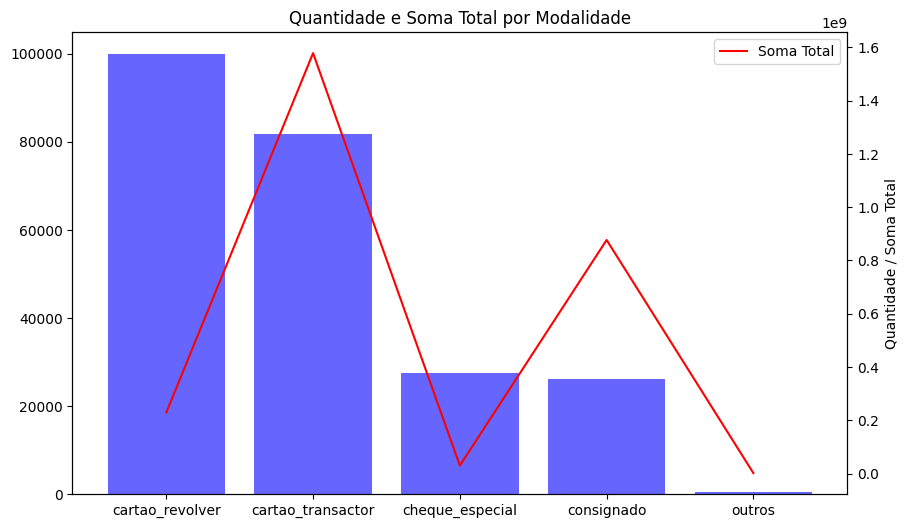

In [21]:
modalidades_df = modalidades_df.dropna(subset=['Modalidade', 'Quantidade'])
plt.figure(figsize=(10, 6))

# Qtd. cada modalidade
plt.bar(modalidades_df['Modalidade'], modalidades_df['Quantidade'], color='blue', alpha=0.6, label='Quantidade')

# Segundo eixo - soma total
plt.twinx()
plt.plot(modalidades_df['Modalidade'], modalidades_df['Soma_Total'], color='red', label='Soma Total')
plt.legend()

plt.title('Quantidade e Soma Total por Modalidade')
plt.xlabel('Modalidade')
plt.ylabel('Quantidade / Soma Total')

plt.show()